In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

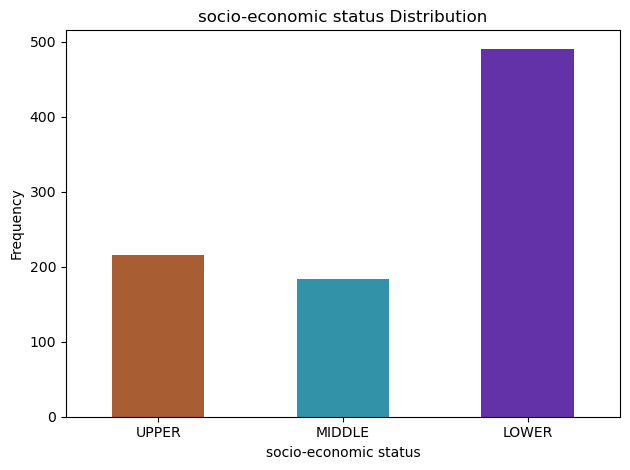

In [26]:
count_Pclass = df['Pclass'].value_counts().sort_index()

custom_labels = {1: 'UPPER', 2: 'MIDDLE', 3: 'LOWER'}

ax = count_Pclass.plot(kind='bar', color=['#a85e32', '#3293a8', '#6432a8'])
ax.set_xticklabels([custom_labels[i] for i in count_Pclass.index], rotation=0)



plt.xlabel('socio-economic status')
plt.ylabel('Frequency')
plt.title('socio-economic status Distribution')
plt.tight_layout()
plt.show()




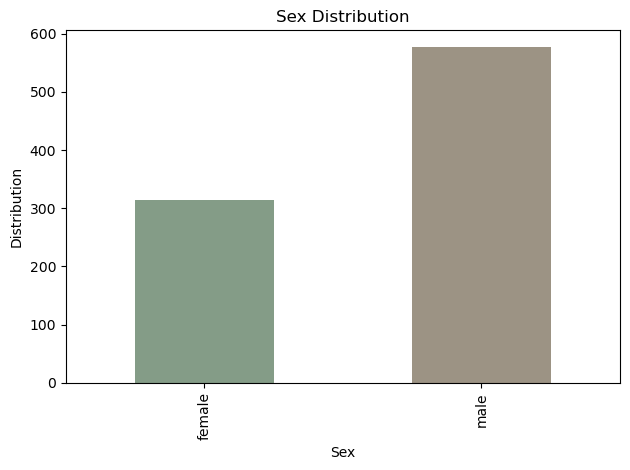

In [27]:
count_Sex = df['Sex'].value_counts().sort_index()

count_Sex.plot(kind='bar', color=['#849c87', '#9c9384'])

plt.xlabel('Sex')
plt.ylabel('Distribution')
plt.title('Sex Distribution')
plt.tight_layout()
plt.show()

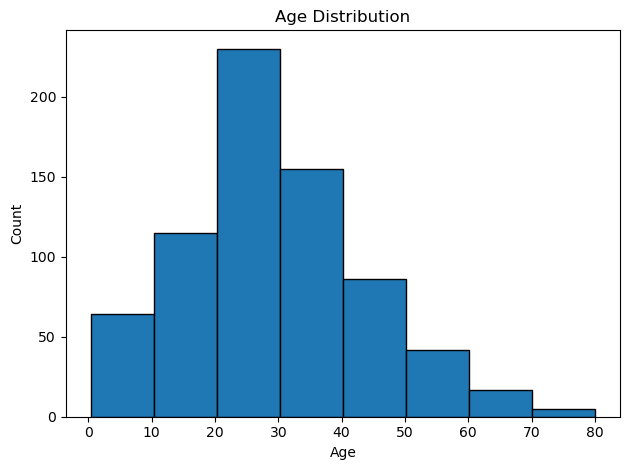

In [28]:
plt.hist(df['Age'], bins=8, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

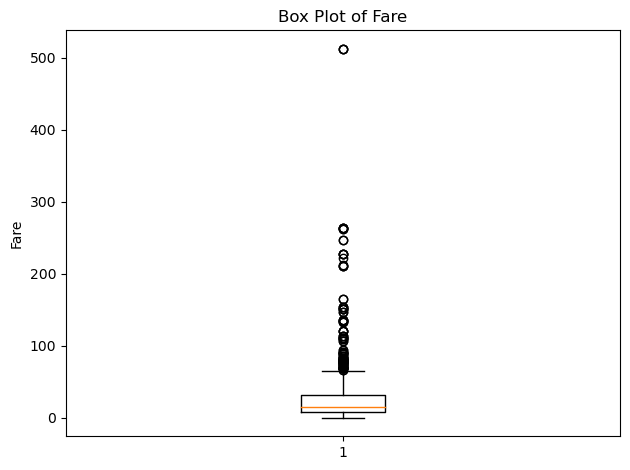

In [31]:
plt.boxplot(df['Fare'], vert=True)
plt.ylabel('Fare')
plt.title('Box Plot of Fare')
plt.tight_layout()
plt.show()

In [37]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [38]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [107]:
mode_v = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_v, inplace=True)

In [61]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [108]:
df_cleaned = df.drop(columns=['Cabin','Name', 'Ticket', 'PassengerId'])
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [109]:
sex_map = {'male':0, 'female':1}
df_cleaned['Sex'] = df_cleaned['Sex'].map(sex_map)

In [110]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Embarked'])

In [111]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

X = df_encoded.drop('Survived', axis=1)
y = df_encoded['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=42)

In [112]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')


Validation Accuracy: 0.82


In [113]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [114]:
df_test_cleaned = df_test.drop(columns=['Cabin','Name', 'Ticket', 'PassengerId'])
df_test_cleaned.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [115]:
df_test_cleaned['Sex'] = df_test_cleaned['Sex'].map(sex_map)

df_test_m = pd.get_dummies(df_test_cleaned, columns=['Embarked'])

In [119]:
final_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
final_model.fit(X, y)

y_pred = model.predict(df_test_m)

In [120]:
output = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': y_pred
})

output.to_csv('submission.csv', index=False)

